In [1]:
import pandas as pd
import seaborn as sns
import env
import acquire
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
store_data = acquire.get_store_data()
store_data.sale_date = pd.to_datetime(store_data.sale_date)
store_data = store_data.set_index('sale_date').sort_index()
store_data['month'] = store_data.index.month
store_data['day of week'] = store_data.index.day_name()
store_data['sales_total'] = store_data.sale_amount * store_data.item_price

In [41]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 764194 entries, 2013-01-01 to 2017-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       764194 non-null  int64  
 1   item_id        764194 non-null  int64  
 2   item_upc14     764194 non-null  int64  
 3   item_upc12     764194 non-null  int64  
 4   item_brand     764194 non-null  object 
 5   item_name      764194 non-null  object 
 6   item_price     764194 non-null  float64
 7   sale_id        764194 non-null  int64  
 8   sale_amount    764194 non-null  int64  
 9   store_address  764194 non-null  object 
 10  store_zipcode  764194 non-null  int64  
 11  store_city     764194 non-null  object 
 12  store_state    764194 non-null  object 
 13  month          764194 non-null  int64  
 14  day of week    764194 non-null  object 
 15  sales_total    764194 non-null  float64
dtypes: float64(2), int64(8), object(6)
memory usage: 99.1+ MB


In [45]:
store_data['store_id'] = store_data['store_id'].astype(str)
store_data['item_id'] = store_data['item_id'].astype(str)
store_data['item_upc14'] = store_data['item_upc14'].astype(str)
store_data['item_upc12'] = store_data['item_upc12'].astype(str)
store_data['sale_id'] = store_data['sale_id'].astype(str)
store_data['store_zipcode'] = store_data['store_zipcode'].astype(str)
store_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 764194 entries, 2013-01-01 to 2017-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       764194 non-null  object 
 1   item_id        764194 non-null  object 
 2   item_upc14     764194 non-null  object 
 3   item_upc12     764194 non-null  object 
 4   item_brand     764194 non-null  object 
 5   item_name      764194 non-null  object 
 6   item_price     764194 non-null  float64
 7   sale_id        764194 non-null  object 
 8   sale_amount    764194 non-null  int64  
 9   store_address  764194 non-null  object 
 10  store_zipcode  764194 non-null  object 
 11  store_city     764194 non-null  object 
 12  store_state    764194 non-null  object 
 13  month          764194 non-null  int64  
 14  day of week    764194 non-null  object 
 15  sales_total    764194 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 99.1+ MB

In [46]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 764194 entries, 2013-01-01 to 2017-12-31
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   store_id       764194 non-null  object 
 1   item_id        764194 non-null  object 
 2   item_upc14     764194 non-null  object 
 3   item_upc12     764194 non-null  object 
 4   item_brand     764194 non-null  object 
 5   item_name      764194 non-null  object 
 6   item_price     764194 non-null  float64
 7   sale_id        764194 non-null  object 
 8   sale_amount    764194 non-null  int64  
 9   store_address  764194 non-null  object 
 10  store_zipcode  764194 non-null  object 
 11  store_city     764194 non-null  object 
 12  store_state    764194 non-null  object 
 13  month          764194 non-null  int64  
 14  day of week    764194 non-null  object 
 15  sales_total    764194 non-null  float64
dtypes: float64(2), int64(2), object(12)
memory usage: 99.1+ MB

store_id


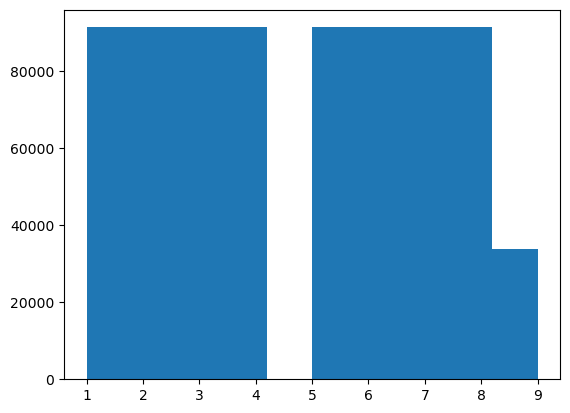

item_id


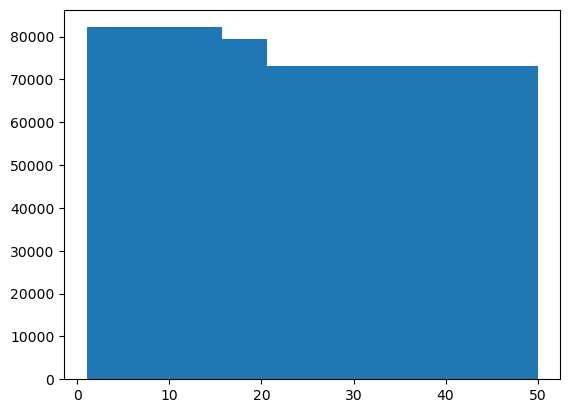

item_upc14


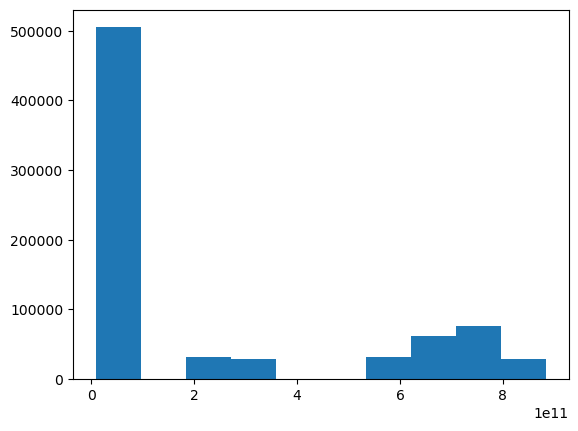

item_upc12


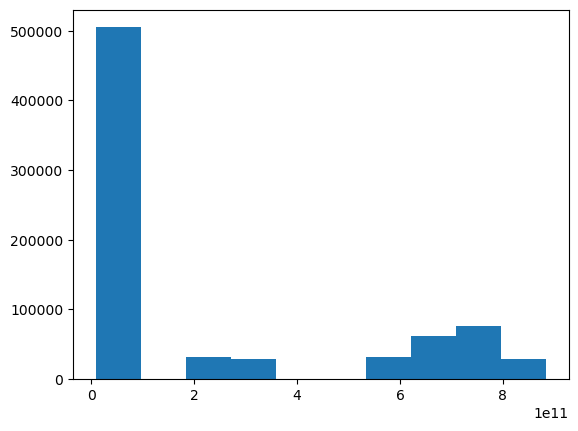

item_brand


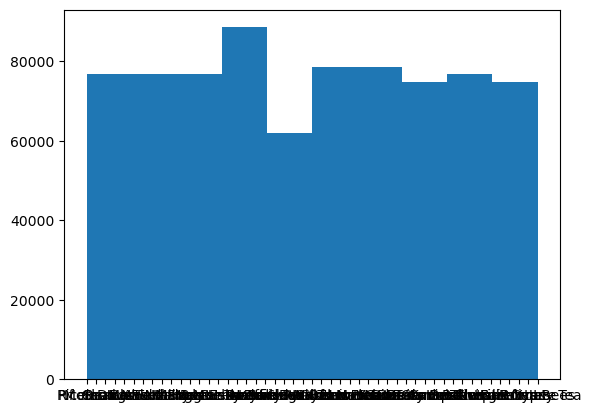

item_name


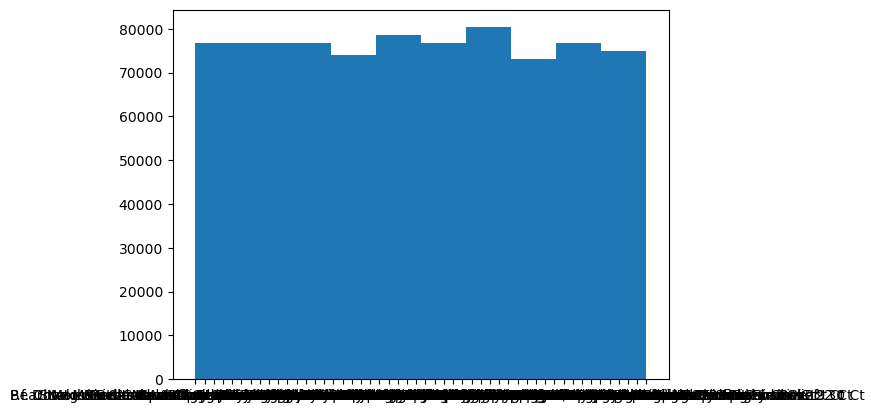

item_price


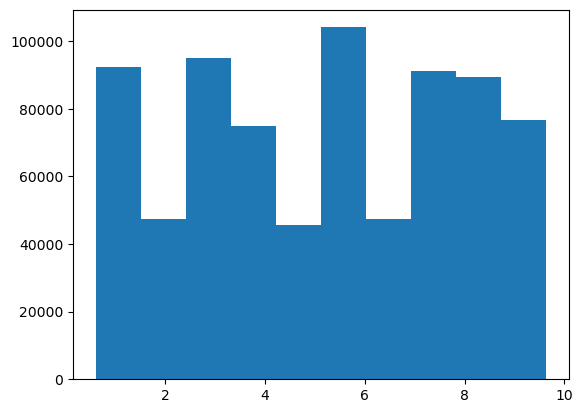

sale_id


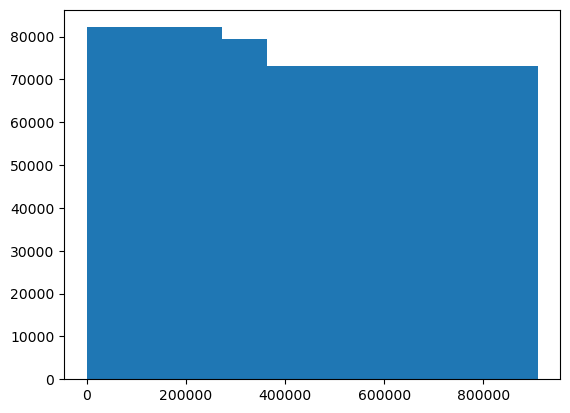

sale_amount


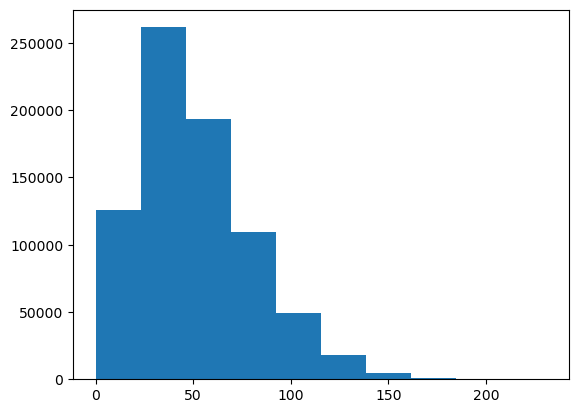

store_address


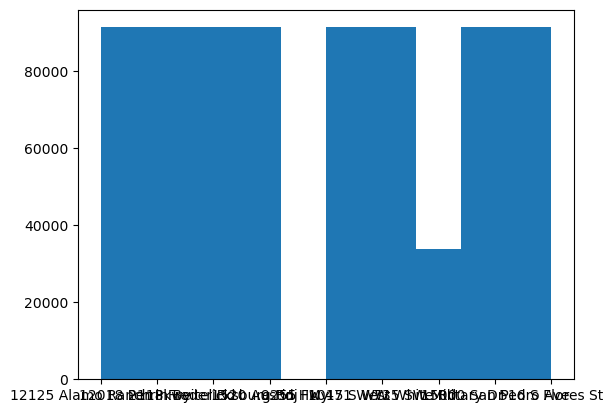

store_zipcode


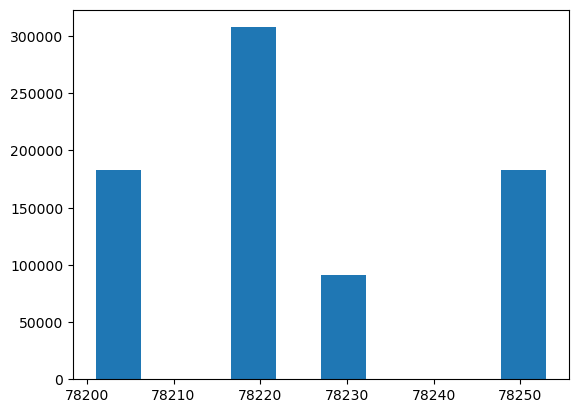

store_city


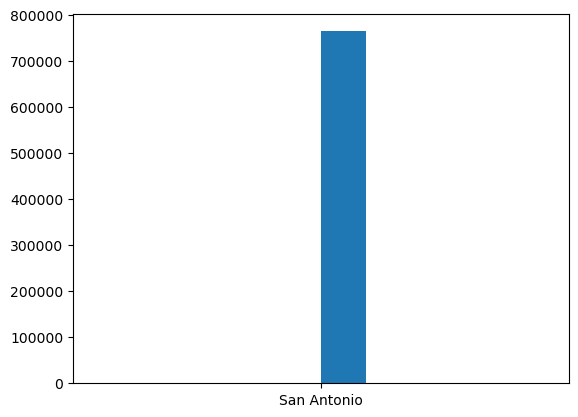

store_state


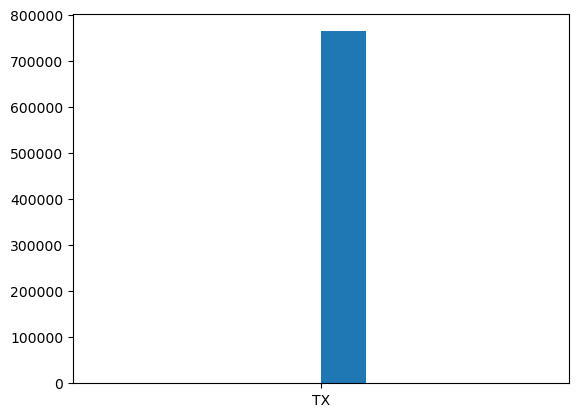

month


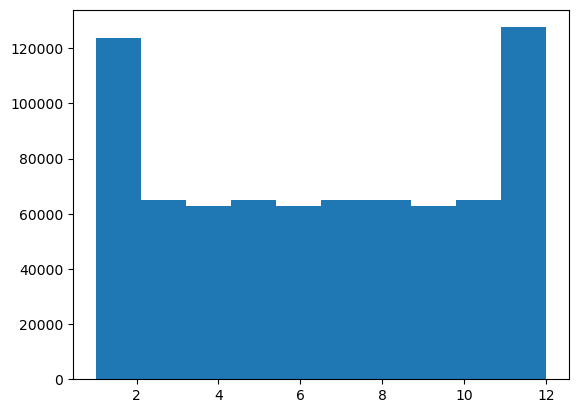

day of week


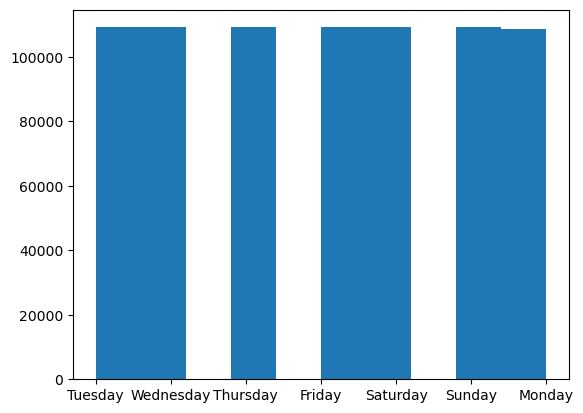

sales_total


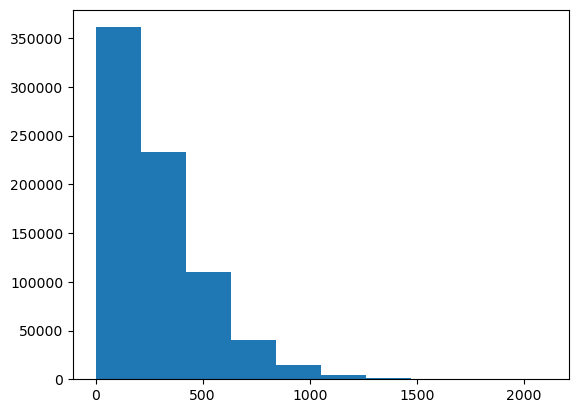

In [6]:
for col in store_data.columns:
    print(col)
    plt.hist(store_data[col])
    plt.show()

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1162/4272194123.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_data.resample('D').mean().item_price.plot(label='daily')
/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1162/4272194123.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_data.resample('W').mean().item_price.plot(label='weekly')
/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1162/4272194123.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either

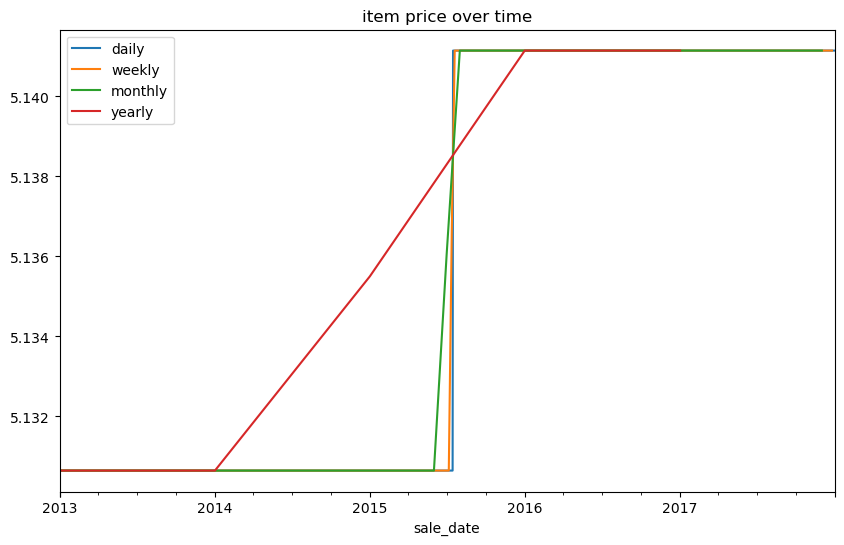

In [51]:
plt.figure(figsize=(10,6))

store_data.resample('D').mean().item_price.plot(label='daily')
store_data.resample('W').mean().item_price.plot(label='weekly')
store_data.resample('M').mean().item_price.plot(label='monthly')
store_data.resample('Y').mean().item_price.plot(label='yearly')


plt.title('item price over time')
plt.legend()
plt.show()

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1162/1450598307.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_data.resample('D').mean().sale_amount.plot(label='daily')
/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1162/1450598307.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_data.resample('W').mean().sale_amount.plot(label='weekly')
/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1162/1450598307.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Eith

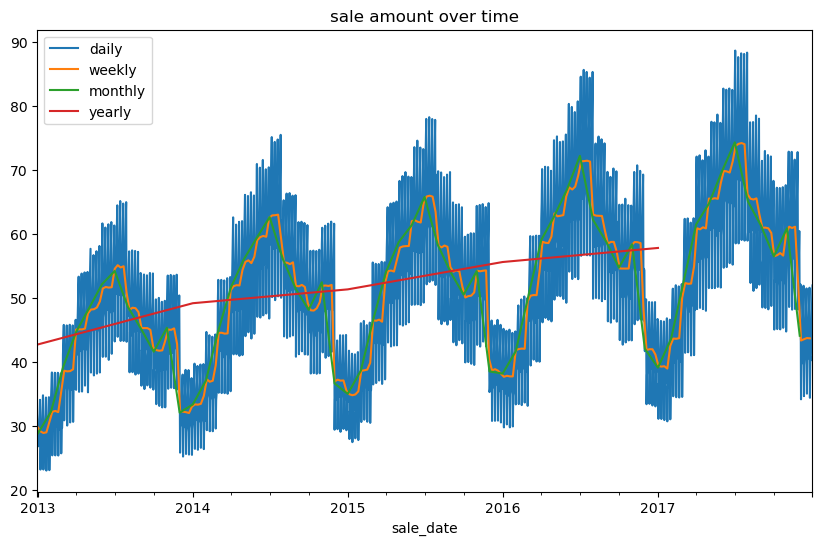

In [48]:
plt.figure(figsize=(10,6))

store_data.resample('D').mean().sale_amount.plot(label='daily')
store_data.resample('W').mean().sale_amount.plot(label='weekly')
store_data.resample('M').mean().sale_amount.plot(label='monthly')
store_data.resample('Y').mean().sale_amount.plot(label='yearly')


plt.title('sale amount over time')
plt.legend()
plt.show()

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1162/998136908.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_data.resample('D').mean().sales_total.plot(label='daily')
/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1162/998136908.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_data.resample('W').mean().sales_total.plot(label='weekly')
/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_1162/998136908.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either 

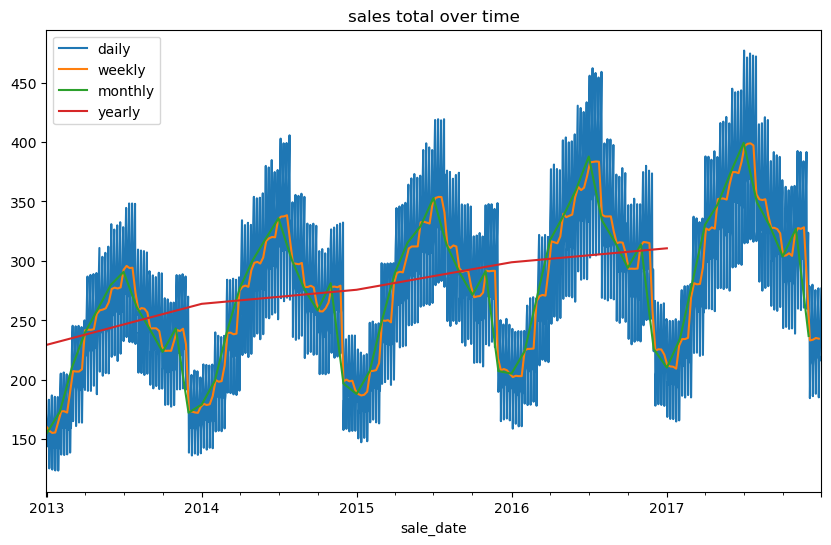

In [52]:
plt.figure(figsize=(10,6))

store_data.resample('D').mean().sales_total.plot(label='daily')
store_data.resample('W').mean().sales_total.plot(label='weekly')
store_data.resample('M').mean().sales_total.plot(label='monthly')
store_data.resample('Y').mean().sales_total.plot(label='yearly')


plt.title('sales total over time')
plt.legend()
plt.show()

<Axes: xlabel='item_price', ylabel='Count'>

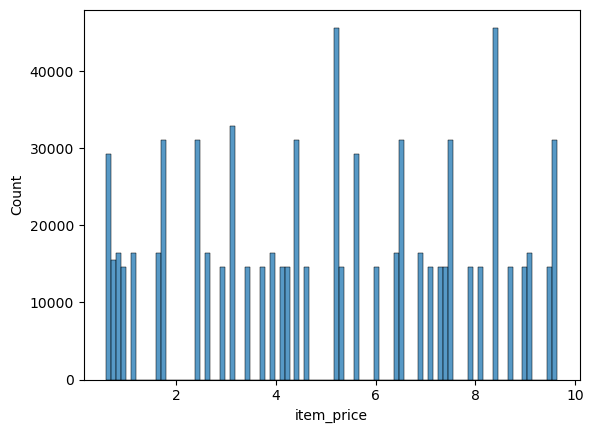

In [53]:
sns.histplot(store_data['item_price'])

<Axes: xlabel='sale_amount', ylabel='Count'>

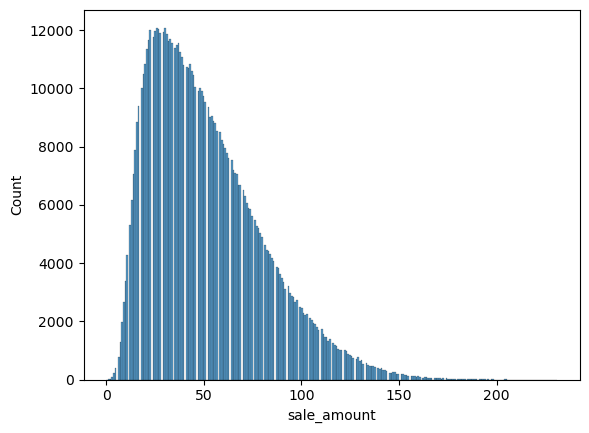

In [54]:
sns.histplot(store_data['sale_amount'])

<Axes: xlabel='sales_total', ylabel='Count'>

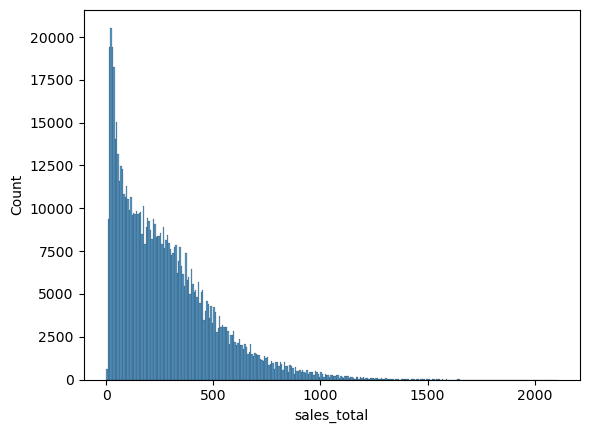

In [55]:
sns.histplot(store_data['sales_total'])

In [56]:
train_size = 0.70 
n = store_data.shape[0] 
test_start_index = round(train_size * n)
test_start_index

534936

In [58]:
train = store_data.iloc[:test_start_index] 
test = store_data.iloc[test_start_index:] 

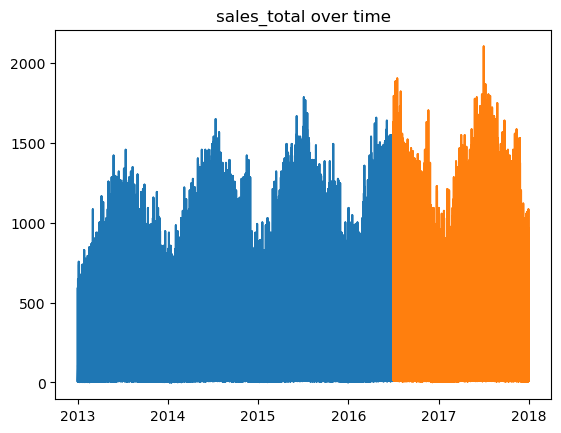

In [61]:
plt.plot(train['sales_total'])
plt.plot(test['sales_total'])
plt.title('sales_total over time')
plt.show()

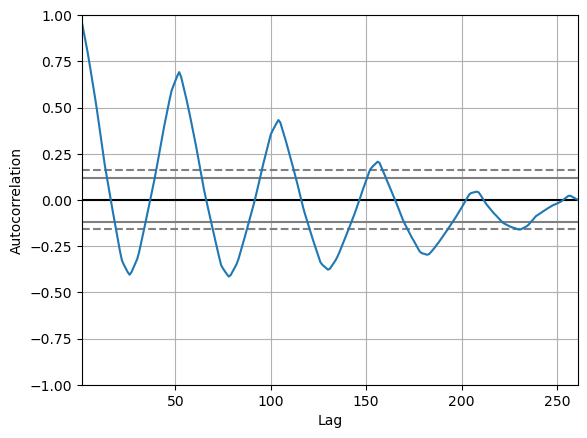

In [63]:
pd.plotting.autocorrelation_plot(store_data['sales_total'].resample('W').mean())
plt.show()

#seasonality of half a year much like weather

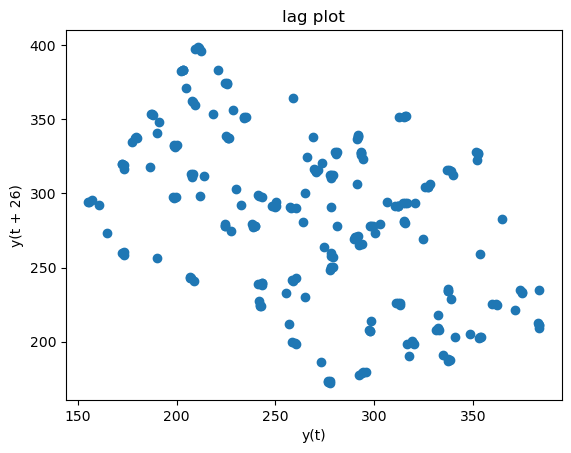

In [66]:

pd.plotting.lag_plot(store_data['sales_total'].resample('W').mean(), lag=26)
plt.title('lag plot');

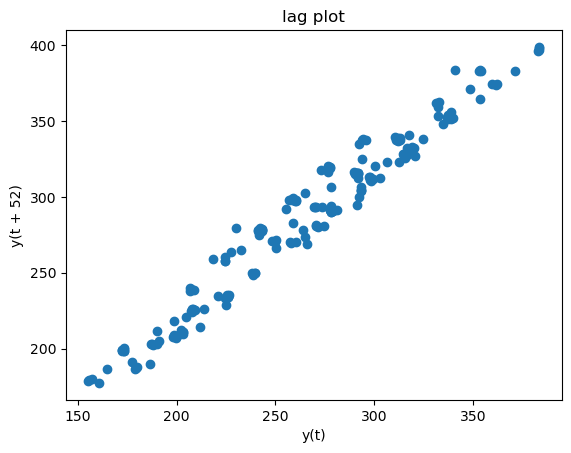

In [67]:
pd.plotting.lag_plot(store_data['sales_total'].resample('W').mean(), lag=52)
plt.title('lag plot');

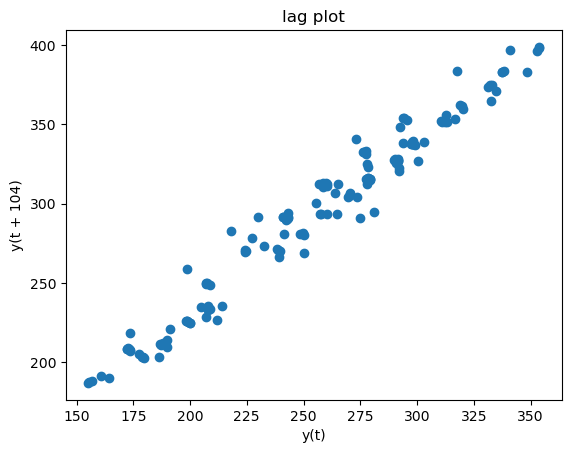

In [68]:
pd.plotting.lag_plot(store_data['sales_total'].resample('W').mean(), lag=104)
plt.title('lag plot');

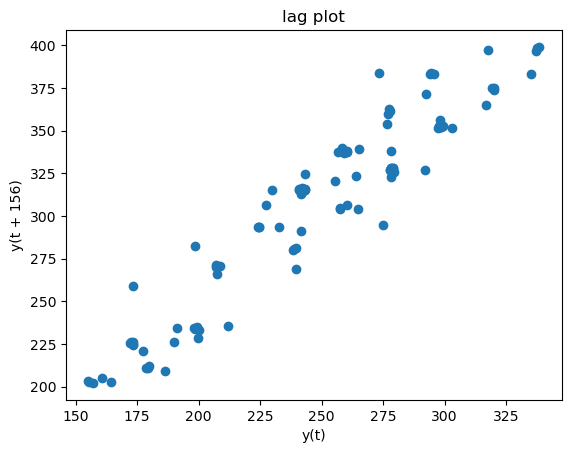

In [69]:
pd.plotting.lag_plot(store_data['sales_total'].resample('W').mean(), lag=156)
plt.title('lag plot');

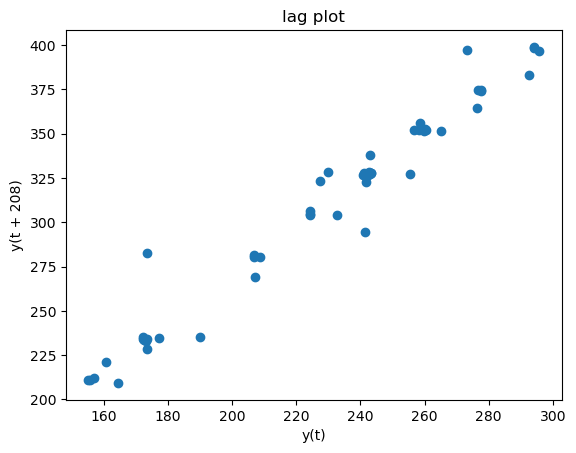

In [70]:
pd.plotting.lag_plot(store_data['sales_total'].resample('W').mean(), lag=208)
plt.title('lag plot');

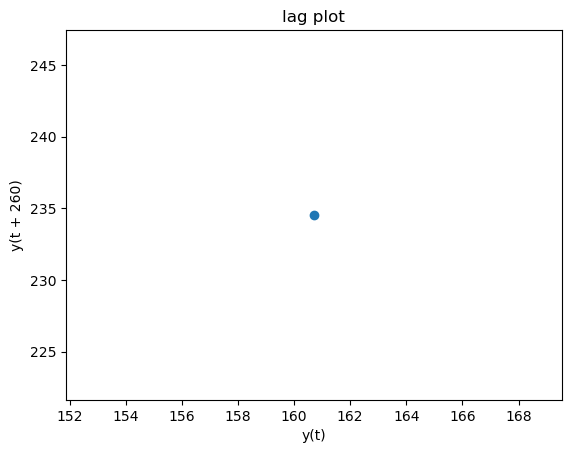

In [71]:
pd.plotting.lag_plot(store_data['sales_total'].resample('W').mean(), lag=260)
plt.title('lag plot');

In [72]:
opsd_germany = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
opsd_germany.Date = pd.to_datetime(opsd_germany.Date)
opsd_germany = opsd_germany.set_index('Date').sort_index()
opsd_germany['month'] = opsd_germany.index.month
opsd_germany['year'] = opsd_germany.index.year
opsd_germany.fillna(0, inplace=True)

In [74]:
opsd_germany.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   Wind+Solar   4383 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


Consumption


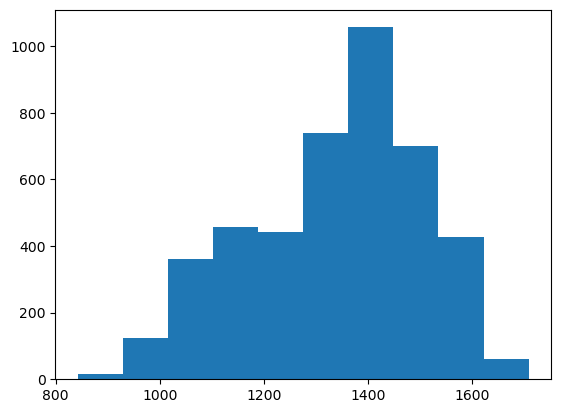

Wind


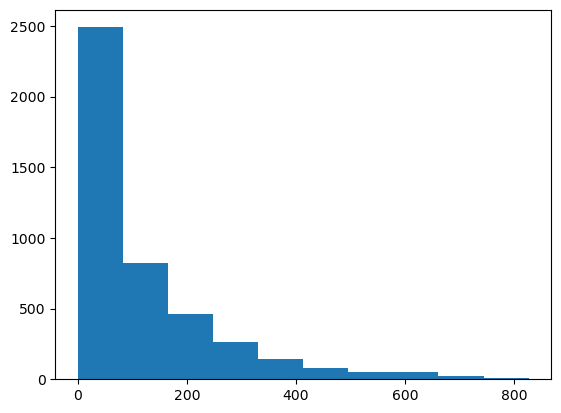

Solar


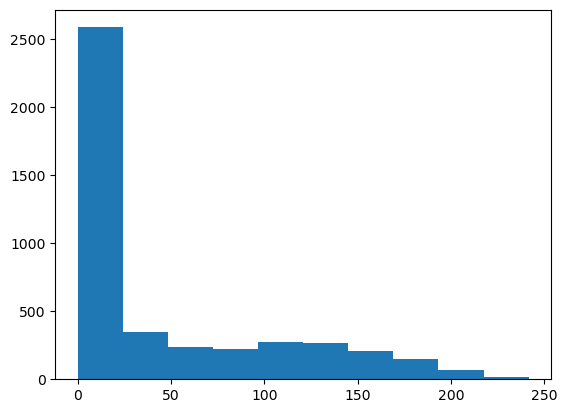

Wind+Solar


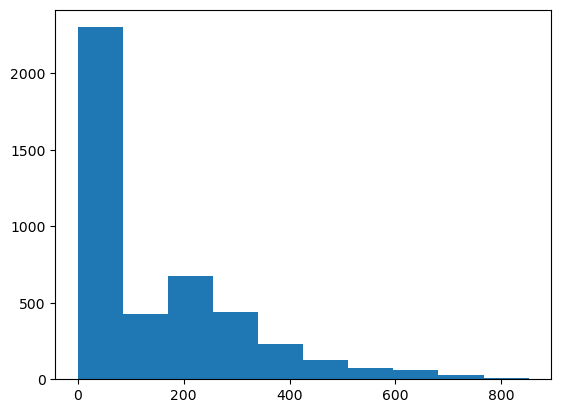

month


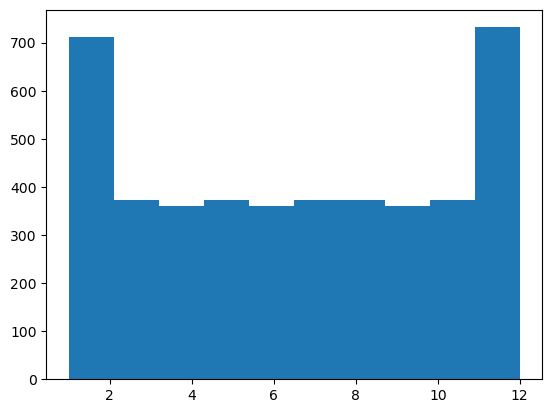

year


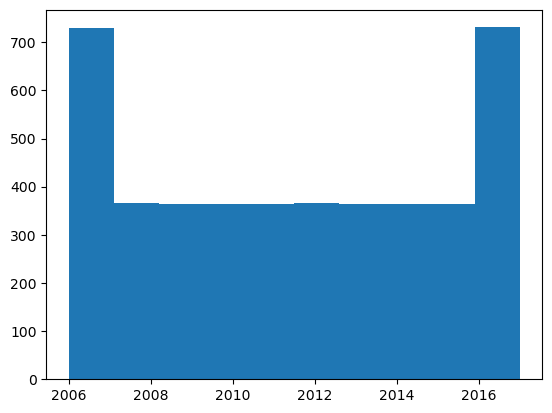

In [77]:
for col in opsd_germany.columns:
    print(col)
    plt.hist(opsd_germany[col])
    plt.show()

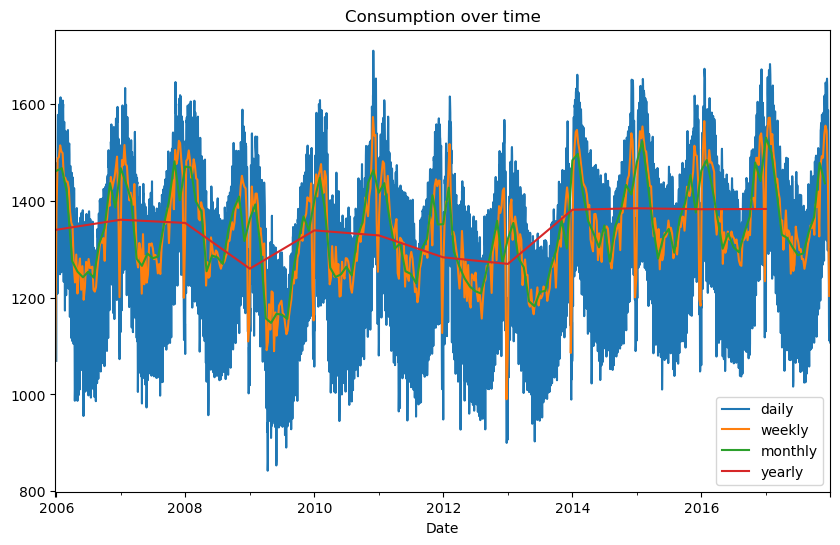

In [76]:
plt.figure(figsize=(10,6))

opsd_germany.resample('D').mean().Consumption.plot(label='daily')
opsd_germany.resample('W').mean().Consumption.plot(label='weekly')
opsd_germany.resample('M').mean().Consumption.plot(label='monthly')
opsd_germany.resample('Y').mean().Consumption.plot(label='yearly')


plt.title('Consumption over time')
plt.legend()
plt.show()

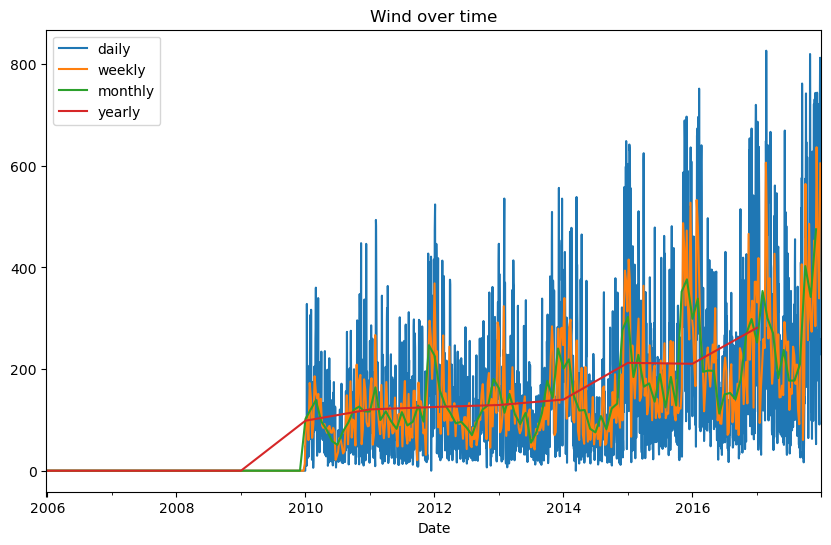

In [78]:
plt.figure(figsize=(10,6))

opsd_germany.resample('D').mean().Wind.plot(label='daily')
opsd_germany.resample('W').mean().Wind.plot(label='weekly')
opsd_germany.resample('M').mean().Wind.plot(label='monthly')
opsd_germany.resample('Y').mean().Wind.plot(label='yearly')


plt.title('Wind over time')
plt.legend()
plt.show()

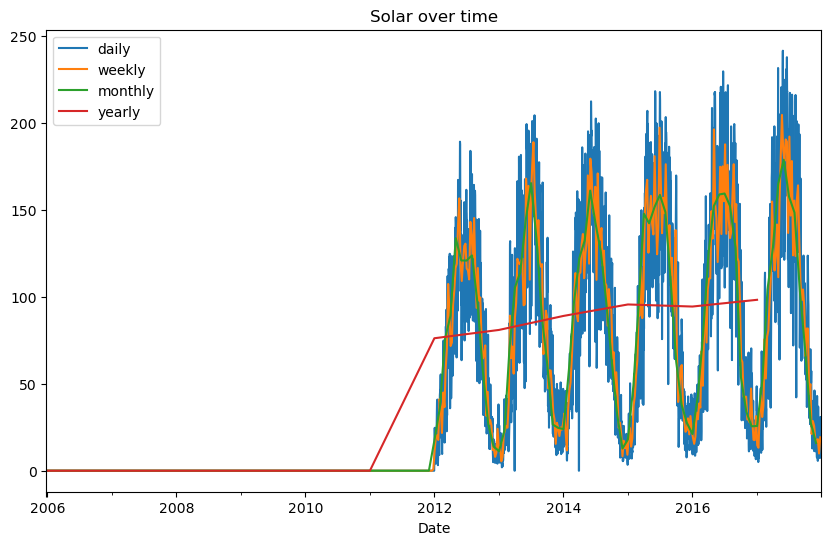

In [79]:
plt.figure(figsize=(10,6))

opsd_germany.resample('D').mean().Solar.plot(label='daily')
opsd_germany.resample('W').mean().Solar.plot(label='weekly')
opsd_germany.resample('M').mean().Solar.plot(label='monthly')
opsd_germany.resample('Y').mean().Solar.plot(label='yearly')


plt.title('Solar over time')
plt.legend()
plt.show()

In [85]:
plt.figure(figsize=(10,6))
a = 'Wind+Solar'
opsd_germany.resample('D').mean().a.plot(label='daily')
opsd_germany.resample('W').mean().Wind+Solar.plot(label='weekly')
opsd_germany.resample('M').mean().Wind+Solar.plot(label='monthly')
opsd_germany.resample('Y').mean().Wind+Solar.plot(label='yearly')


plt.title('Wind and Solar over time')
plt.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'a'

<Figure size 1000x600 with 0 Axes>

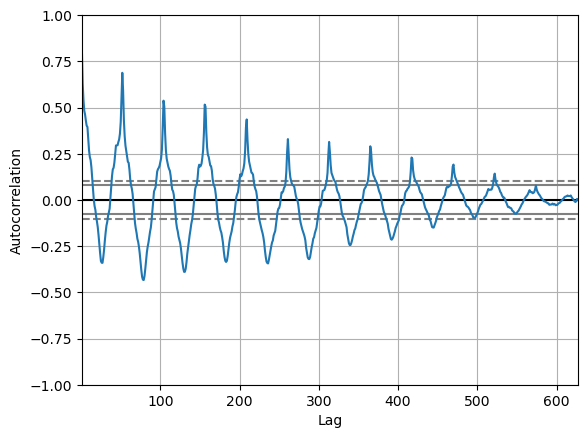

In [86]:
pd.plotting.autocorrelation_plot(opsd_germany['Consumption'].resample('W').mean())
plt.show()

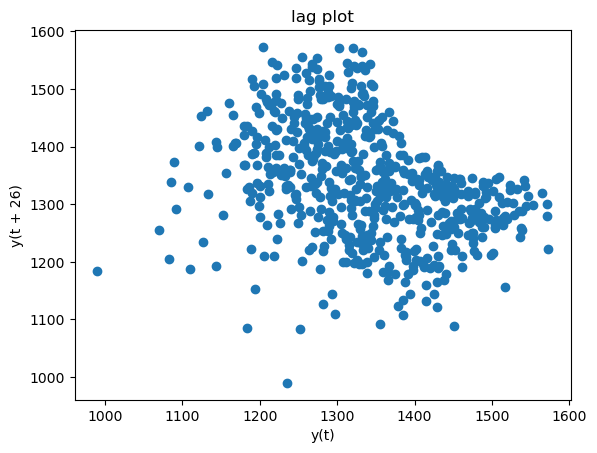

In [88]:
pd.plotting.lag_plot(opsd_germany['Consumption'].resample('W').mean(), lag=26)
plt.title('lag plot');

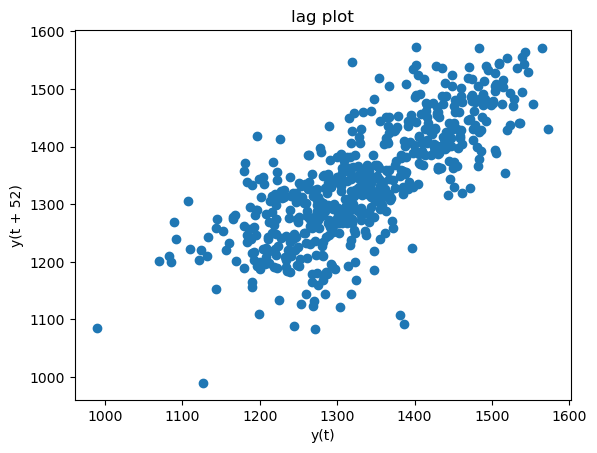

In [89]:
pd.plotting.lag_plot(opsd_germany['Consumption'].resample('W').mean(), lag=52)
plt.title('lag plot');

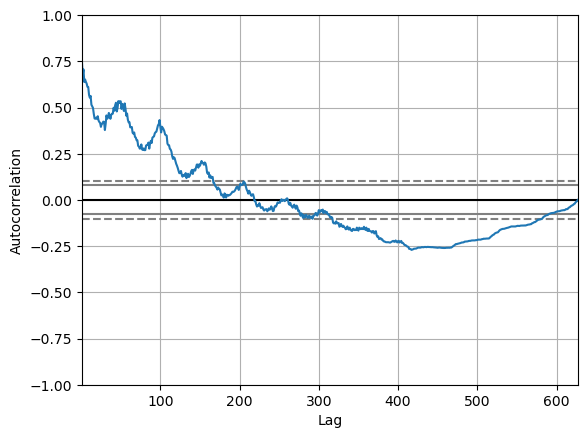

In [90]:
pd.plotting.autocorrelation_plot(opsd_germany['Wind'].resample('W').mean())
plt.show()

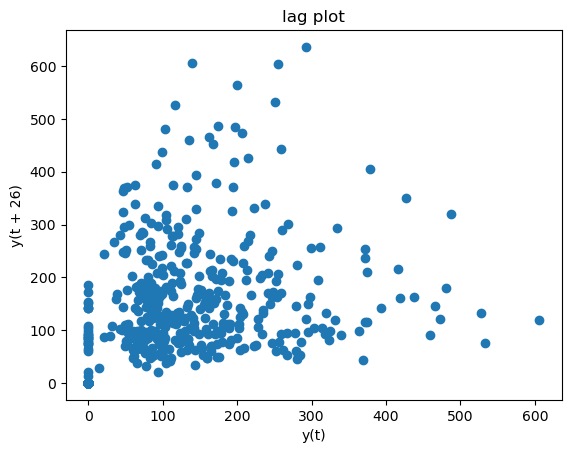

In [93]:
pd.plotting.lag_plot(opsd_germany['Wind'].resample('W').mean(), lag=26)
plt.title('lag plot');

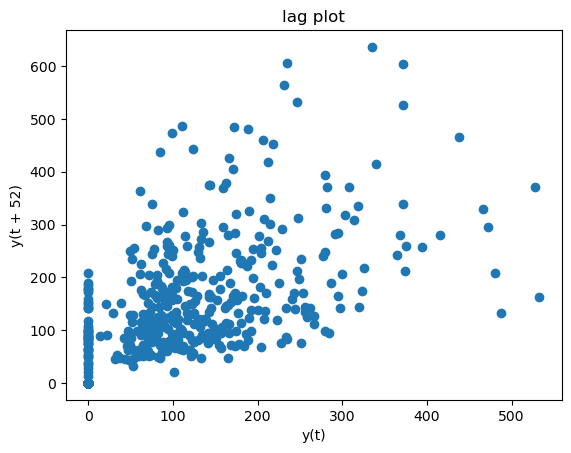

In [97]:
pd.plotting.lag_plot(opsd_germany['Wind'].resample('W').mean(), lag=52)
plt.title('lag plot');

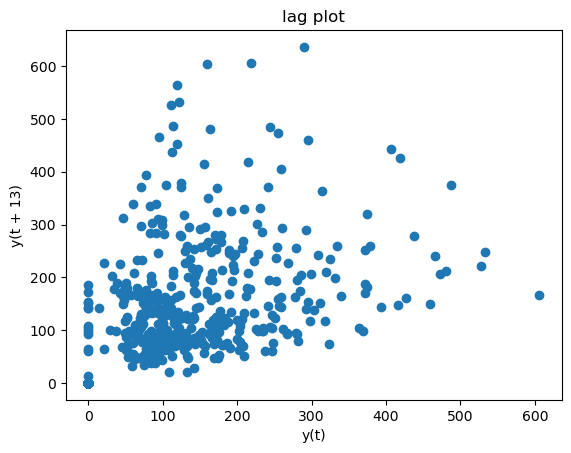

In [98]:
pd.plotting.lag_plot(opsd_germany['Wind'].resample('W').mean(), lag=13)
plt.title('lag plot');

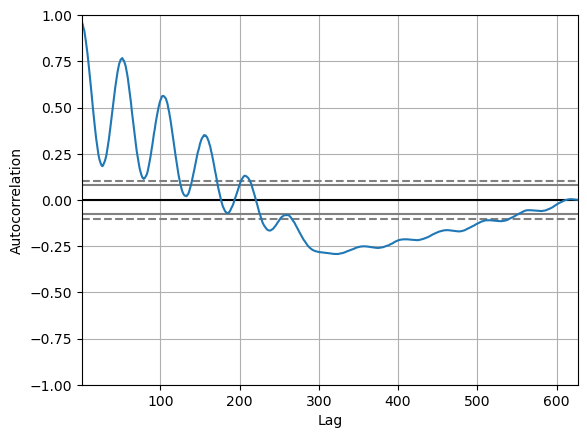

In [91]:
pd.plotting.autocorrelation_plot(opsd_germany['Solar'].resample('W').mean())
plt.show()

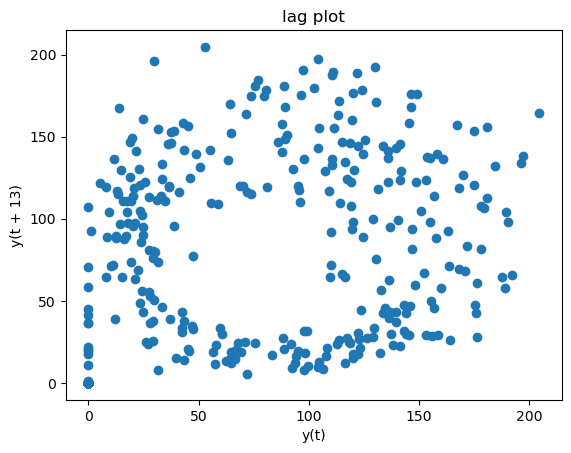

In [100]:
pd.plotting.lag_plot(opsd_germany['Solar'].resample('W').mean(), lag=13)
plt.title('lag plot');

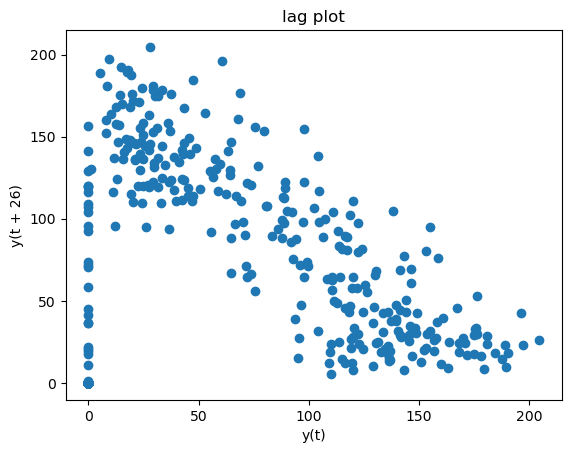

In [99]:
pd.plotting.lag_plot(opsd_germany['Solar'].resample('W').mean(), lag=26)
plt.title('lag plot');

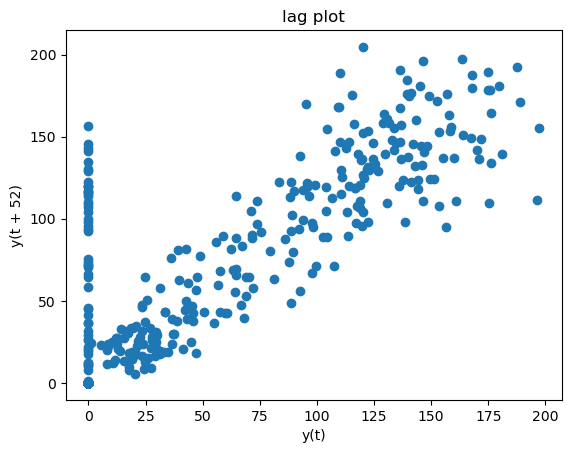

In [101]:
pd.plotting.lag_plot(opsd_germany['Solar'].resample('W').mean(), lag=52)
plt.title('lag plot');

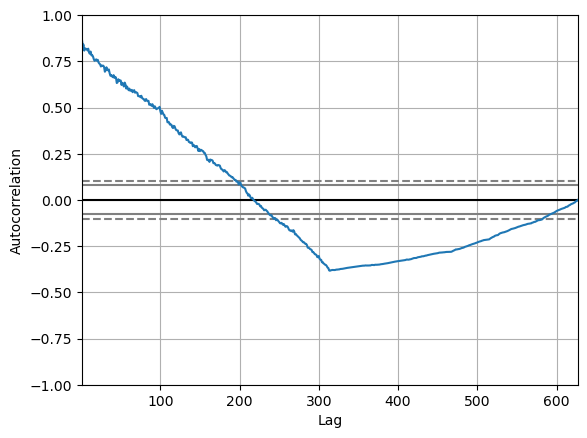

In [92]:
pd.plotting.autocorrelation_plot(opsd_germany['Wind+Solar'].resample('W').mean())
plt.show()

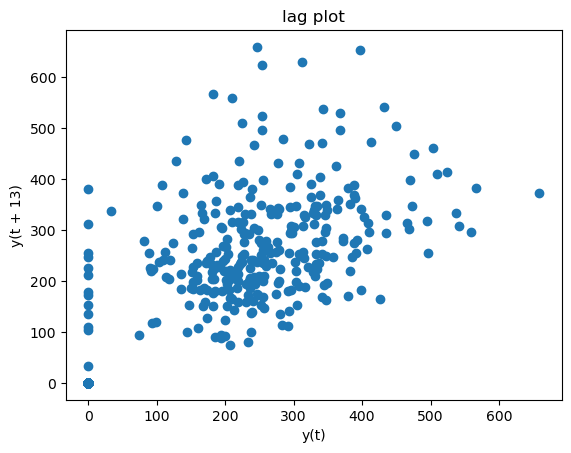

In [102]:
pd.plotting.lag_plot(opsd_germany['Wind+Solar'].resample('W').mean(), lag=13)
plt.title('lag plot');

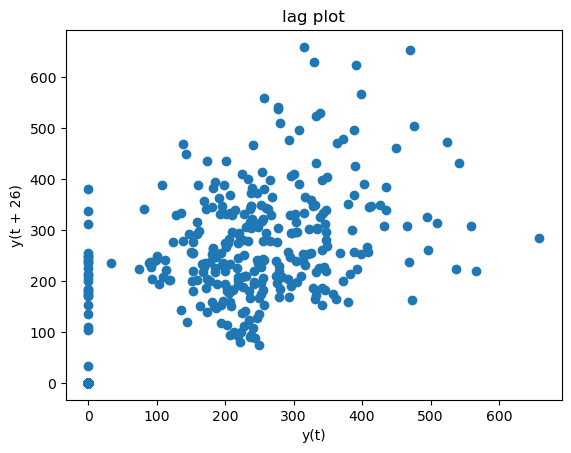

In [103]:
pd.plotting.lag_plot(opsd_germany['Wind+Solar'].resample('W').mean(), lag=26)
plt.title('lag plot');

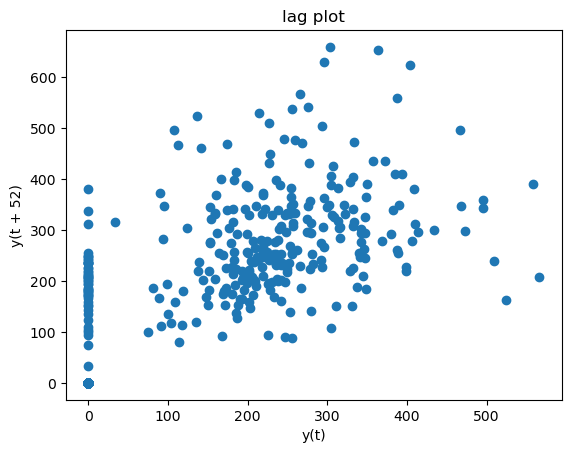

In [104]:
pd.plotting.lag_plot(opsd_germany['Wind+Solar'].resample('W').mean(), lag=52)
plt.title('lag plot');

In [105]:
opsd_germany['traditional'] = opsd_germany['Consumption'] - opsd_germany['Wind+Solar']

In [129]:
opsd_germany.iloc[2150:2200]

,Consumption,Wind,Solar,Wind+Solar,month,year,traditional
Date,,,,,,,
2011-11-21,1496.654,31.720,0.000,0.000,11,2011,1496.654
2011-11-22,1540.564,22.571,0.000,0.000,11,2011,1540.564
2011-11-23,1557.650,21.553,0.000,0.000,11,2011,1557.650
2011-11-24,1549.322,91.387,0.000,0.000,11,2011,1549.322
2011-11-25,1524.047,221.703,0.000,0.000,11,2011,1524.047
2011-11-26,1280.691,312.053,0.000,0.000,11,2011,1280.691
2011-11-27,1159.414,427.222,0.000,0.000,11,2011,1159.414
2011-11-28,1501.093,131.043,0.000,0.000,11,2011,1501.093
2011-11-29,1543.250,193.681,0.000,0.000,11,2011,1543.250


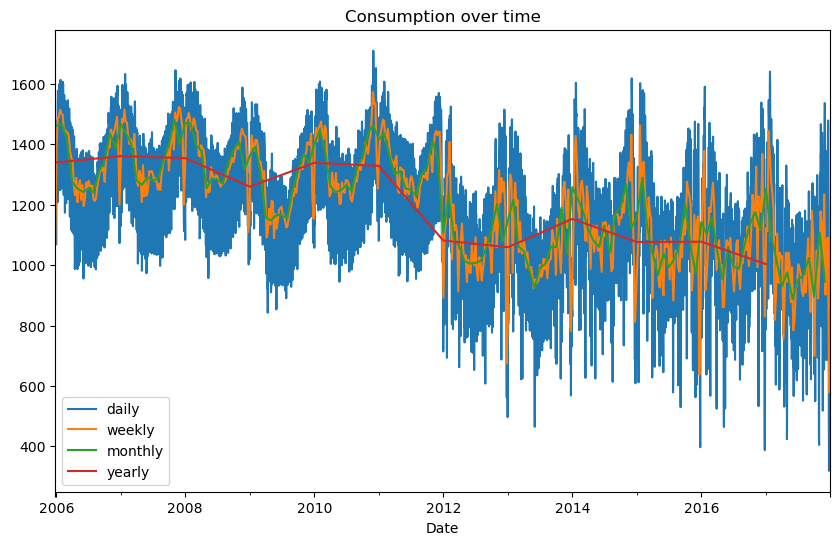

In [107]:
plt.figure(figsize=(10,6))

opsd_germany.resample('D').mean().traditional.plot(label='daily')
opsd_germany.resample('W').mean().traditional.plot(label='weekly')
opsd_germany.resample('M').mean().traditional.plot(label='monthly')
opsd_germany.resample('Y').mean().traditional.plot(label='yearly')


plt.title('Consumption over time')
plt.legend()
plt.show()

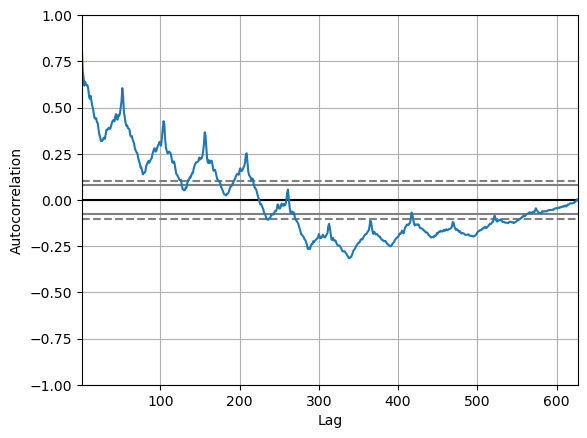

In [108]:
pd.plotting.autocorrelation_plot(opsd_germany['traditional'].resample('W').mean())
plt.show()

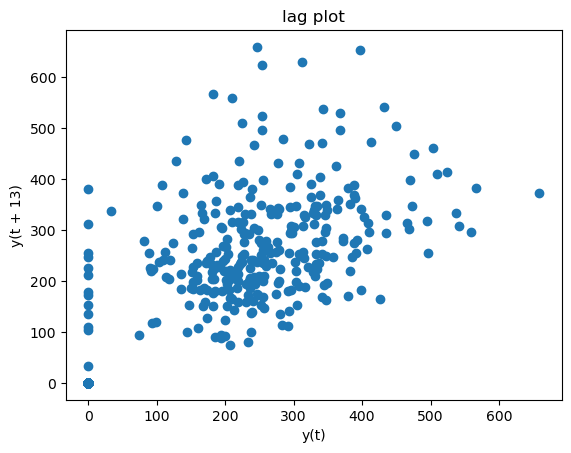

In [110]:
pd.plotting.lag_plot(opsd_germany['Wind+Solar'].resample('W').mean(), lag=13)
plt.title('lag plot');

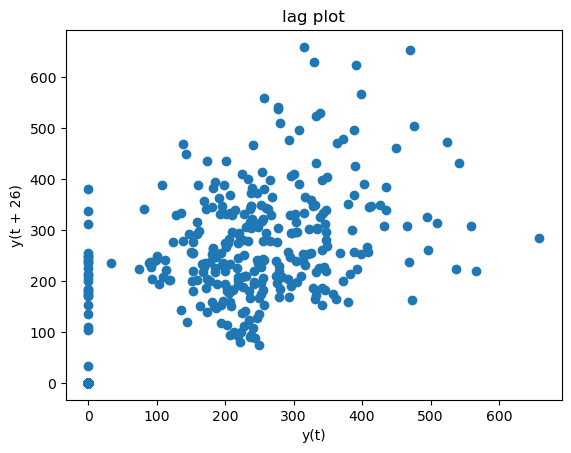

In [109]:
pd.plotting.lag_plot(opsd_germany['Wind+Solar'].resample('W').mean(), lag=26)
plt.title('lag plot');

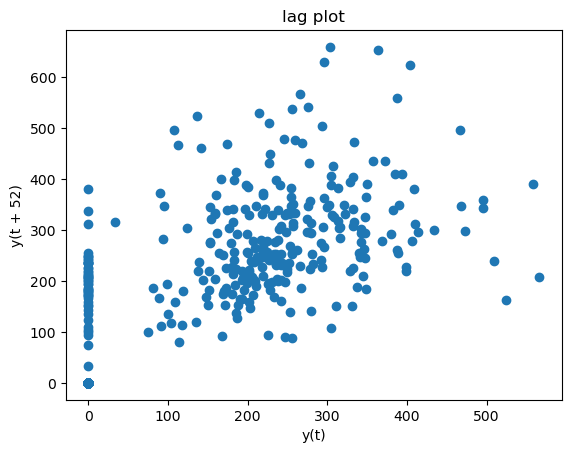

In [111]:
pd.plotting.lag_plot(opsd_germany['Wind+Solar'].resample('W').mean(), lag=52)
plt.title('lag plot');

In [112]:
import statsmodels.api as sm

In [115]:
y = opsd_germany.traditional.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)

In [116]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

In [117]:
decomposition

,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-3.227717,NaN
2006-01-08,1381.300143,NaN,-184.486981,NaN
2006-01-15,1486.730286,NaN,-85.354630,NaN
2006-01-22,1490.031143,NaN,65.621552,NaN
2006-01-29,1514.176857,NaN,119.007047,NaN
...,...,...,...,...
2017-12-03,1233.581171,NaN,133.227467,NaN
2017-12-10,901.869946,NaN,126.312832,NaN
2017-12-17,1083.181317,NaN,-3.227717,NaN


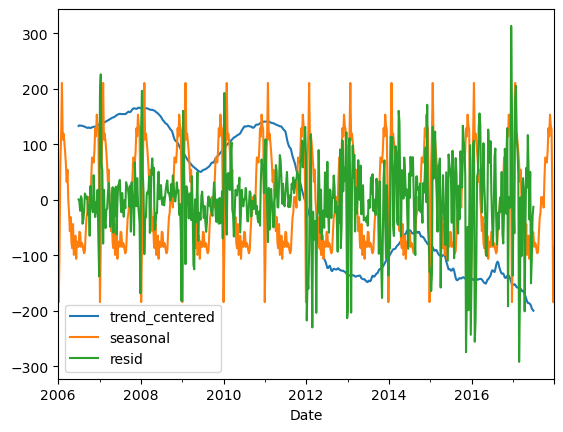

In [118]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

In [135]:
opsd_germany['traditional.actual'] = opsd_germany['Consumption'] - opsd_germany['Wind'] - opsd_germany['Solar']

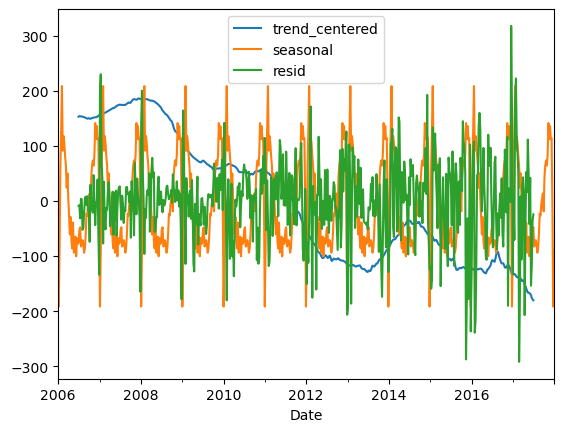

In [137]:
y = opsd_germany['traditional.actual'].resample('W').mean()

result = sm.tsa.seasonal_decompose(y)

decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();

In [133]:
opsd_germany

,Consumption,Wind,Solar,Wind+Solar,month,year,traditional,traditional_actual,traditional.actual
Date,,,,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006,1069.18400,1069.18400,1069.18400
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006,1380.52100,1380.52100,1380.52100
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006,1442.53300,1442.53300,1442.53300
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006,1457.21700,1457.21700,1457.21700
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006,1477.13100,1477.13100,1477.13100
...,...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017,852.90391,852.90391,852.90391
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017,779.27798,779.27798,779.27798
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017,680.95653,680.95653,680.95653


In [138]:
from vega_datasets import data

In [139]:
bird = data.birdstrikes()

In [142]:
bird.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Airport__Name               10000 non-null  object 
 1   Aircraft__Make_Model        10000 non-null  object 
 2   Effect__Amount_of_damage    10000 non-null  object 
 3   Flight_Date                 10000 non-null  object 
 4   Aircraft__Airline_Operator  10000 non-null  object 
 5   Origin_State                10000 non-null  object 
 6   When__Phase_of_flight       10000 non-null  object 
 7   Wildlife__Size              10000 non-null  object 
 8   Wildlife__Species           10000 non-null  object 
 9   When__Time_of_day           10000 non-null  object 
 10  Cost__Other                 10000 non-null  int64  
 11  Cost__Repair                10000 non-null  int64  
 12  Cost__Total_$               10000 non-null  int64  
 13  Speed_IAS_in_knots          7164